In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:/Users/chand/Downloads/covid19_tweets.csv")
df.columns
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [64]:
import neattext.functions as nfx

df['clean_tweet'] = df['text'].apply(nfx.remove_hashtags)
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)


In [65]:
df[['text','clean_tweet']]


,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and wouldnt it have made more sense to ha...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax We all cl...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciation f...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks for nominating me for the challenge I n...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020 The year of insanity Lol
179105,@CTVNews A powerful painting by Juan Lucena. I...,A powerful painting by Juan Lucena Its a trib...
179106,"More than 1,200 students test positive for #CO...",More than 1200 students test positive for at m...


Sentimental analysis

In [66]:
from textblob import TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)
df['sentiment_results']


0         {'polarity': -0.25, 'subjectivity': 0.25, 'sen...
1         {'polarity': 0.5, 'subjectivity': 0.5, 'sentim...
2         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3         {'polarity': 0.0, 'subjectivity': 0.3571428571...
4         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                                ...                        
179103    {'polarity': 0.2, 'subjectivity': 0.2, 'sentim...
179104    {'polarity': 0.8, 'subjectivity': 0.7, 'sentim...
179105    {'polarity': 0.3, 'subjectivity': 1.0, 'sentim...
179106    {'polarity': 0.26325757575757575, 'subjectivit...
179107    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 179108, dtype: object

In [67]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_tweet,sentiment_results
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,If I smelled the scent of hand sanitizers toda...,"{'polarity': -0.25, 'subjectivity': 0.25, 'sen..."
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,Hey and wouldnt it have made more sense to ha...,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim..."
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,Trump never once claimed was a hoax We all cl...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,The one gift has give me is an appreciation f...,"{'polarity': 0.0, 'subjectivity': 0.3571428571..."
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,25 July : Media Bulletin on Novel,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."


In [68]:
df['sentiment_results'].iloc[0]

{'polarity': -0.25, 'subjectivity': 0.25, 'sentiment': 'Negative'}

In [69]:
pd.json_normalize(df['sentiment_results'].iloc[0])

,polarity,subjectivity,sentiment
0,-0.25,0.25,Negative


In [70]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [71]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,If I smelled the scent of hand sanitizers toda...,"{'polarity': -0.25, 'subjectivity': 0.25, 'sen...",-0.25,0.250000,Negative
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,Hey and wouldnt it have made more sense to ha...,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim...",0.50,0.500000,Positive
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,Trump never once claimed was a hoax We all cl...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,The one gift has give me is an appreciation f...,"{'polarity': 0.0, 'subjectivity': 0.3571428571...",0.00,0.357143,Neutral
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,25 July : Media Bulletin on Novel,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral


<Axes: >

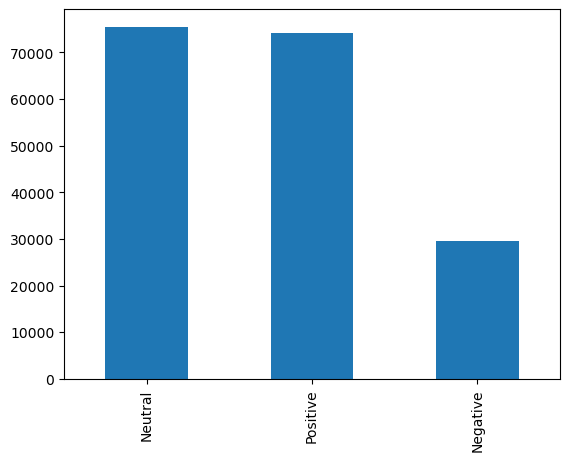

In [81]:
df['sentiment'].value_counts()
df['sentiment'].value_counts().plot(kind='bar')


# sns.countplot(df['sentiment'])

In [73]:
# Remove Stopwords and Convert to Tokens
positive_tweet = df[df['sentiment'] == 'Positive']['clean_tweet']
neutral_tweet = df[df['sentiment'] == 'Neutral']['clean_tweet']
negative_tweet = df[df['sentiment'] == 'Negative']['clean_tweet']

positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

positive_tweet

1         Hey and  wouldnt it have made more sense to ha...
6         How Will Change Work in General (and recruitin...
8                 Praying for good health and recovery of  
12        👋🏻 — no one will be safe from until everyone i...
13        Lets all protect ourselves from Its real and t...
                                ...                        
179096    We were really bummed we couldn’t cop one of t...
179103    Thanks for nominating me for the challenge I n...
179104                       2020 The year of insanity Lol 
179105     A powerful painting by Juan Lucena Its a trib...
179106    More than 1200 students test positive for at m...
Name: clean_tweet, Length: 74154, dtype: object

In [74]:
# Tokenization
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]
neut_tokens = [token for line in neutral_tweet_list  for token in line.split()]

pos_tokens

['Hey',
 'wouldnt',
 'sense',
 'players',
 'pay',
 'respects',
 'A…',
 'Change',
 'Work',
 'General',
 '(and',
 'recruiting',
 'specifically)',
 'via/',
 'Praying',
 'good',
 'health',
 'recovery',
 '👋🏻',
 '—',
 'safe',
 'safe',
 'commit',
 'ensure…',
 'Lets',
 'protect',
 'real',
 'numbers',
 'climbing',
 'fast',
 'Continent',
 'Lets',
 'n…',
 'Second',
 'wave',
 'Flandersback',
 'COVID',
 'Update:',
 'infection',
 'rate',
 'Florida',
 'following',
 'natural',
 'curve',
 'experts',
 'predicted',
 'initial',
 'cu…',
 'Good',
 'Patriots',
 'Volunteer',
 'Election',
 'Judge',
 'Polls',
 'open',
 'without…',
 'comprehensive',
 'review',
 'amp',
 'Analysis:',
 'key',
 'ways',
 'WASH',
 'help',
 'reduce',
 'transmission…',
 'crosses',
 '2',
 'lakh',
 'mark',
 '150055',
 'ppp',
 'recovered',
 'far',
 'positive',
 'today',
 '6988/total…',
 'Actor',
 'father',
 'MrGKReddy',
 'tested',
 'positive',
 '15/20',
 'days',
 's…',
 'safe',
 'place',
 'visit',
 'guests',
 'said',
 'hotel',
 'meticulous

In [75]:
from collections import Counter
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [76]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

most_common_pos_words

{'cases': 10310,
 'new': 9947,
 'amp': 5298,
 'positive': 3888,
 'people': 3655,
 'New': 3325,
 'deaths': 3292,
 'COVID19': 2745,
 'pandemic': 1929,
 'total': 1783,
 'reported': 1773,
 'safe': 1677,
 'today': 1661,
 'confirmed': 1522,
 'latest': 1468,
 'like': 1455,
 'time': 1455,
 '|': 1454,
 'good': 1449,
 'tested': 1398,
 'need': 1393,
 '24': 1380,
 'coronavirus': 1362,
 'day': 1331,
 'number': 1270,
 'right': 1266,
 'reports': 1264,
 'India': 1230,
 'Total': 1227,
 '2020': 1222}

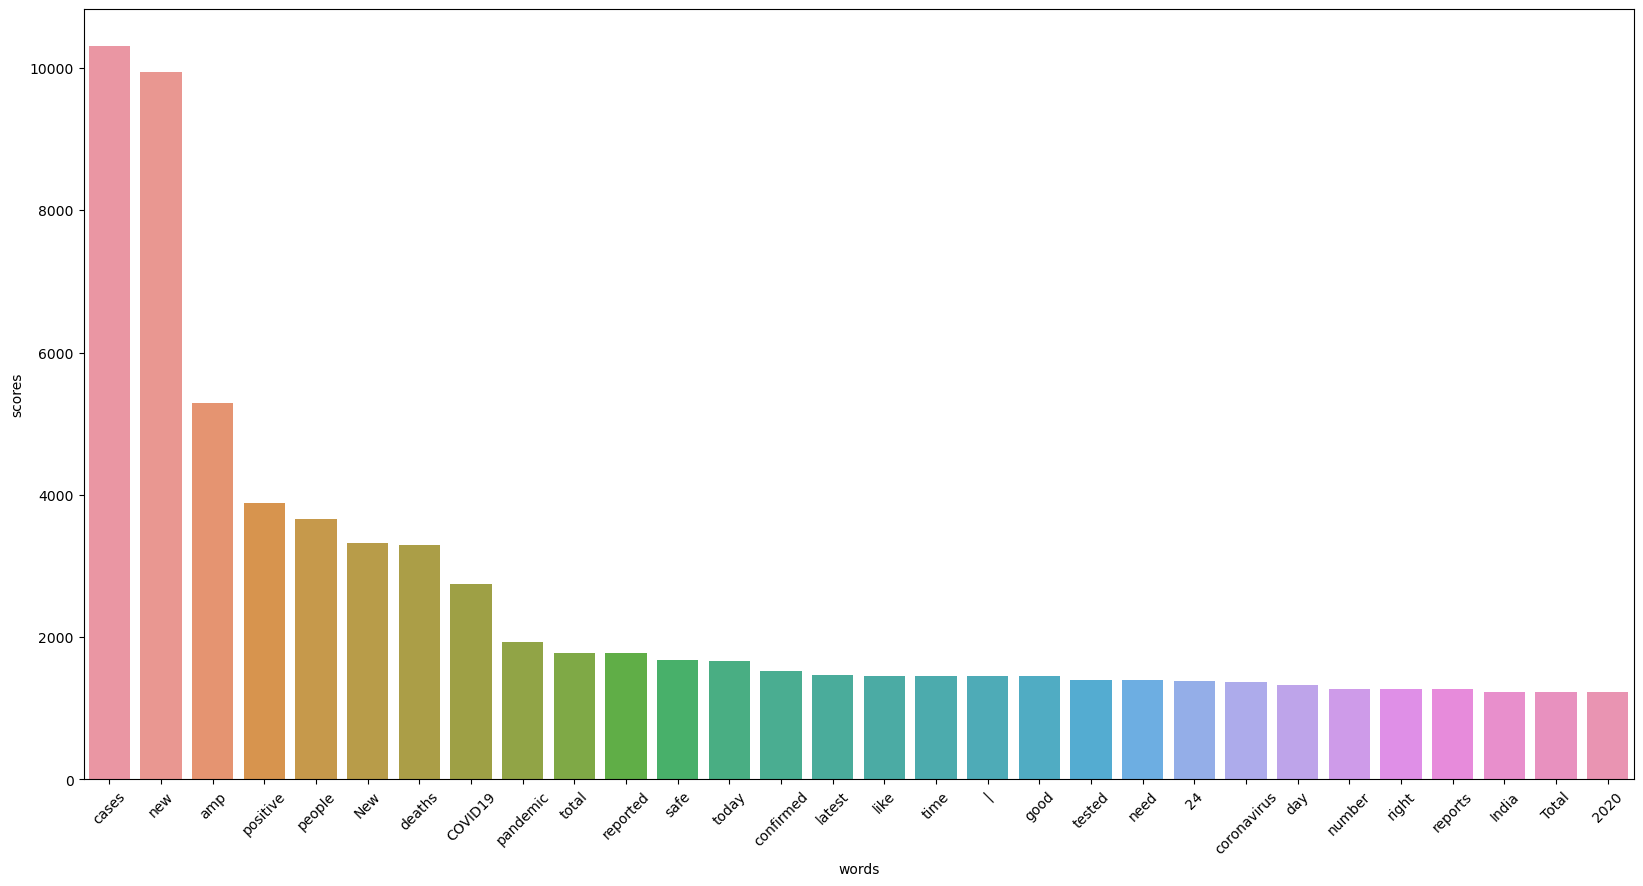

In [77]:
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()

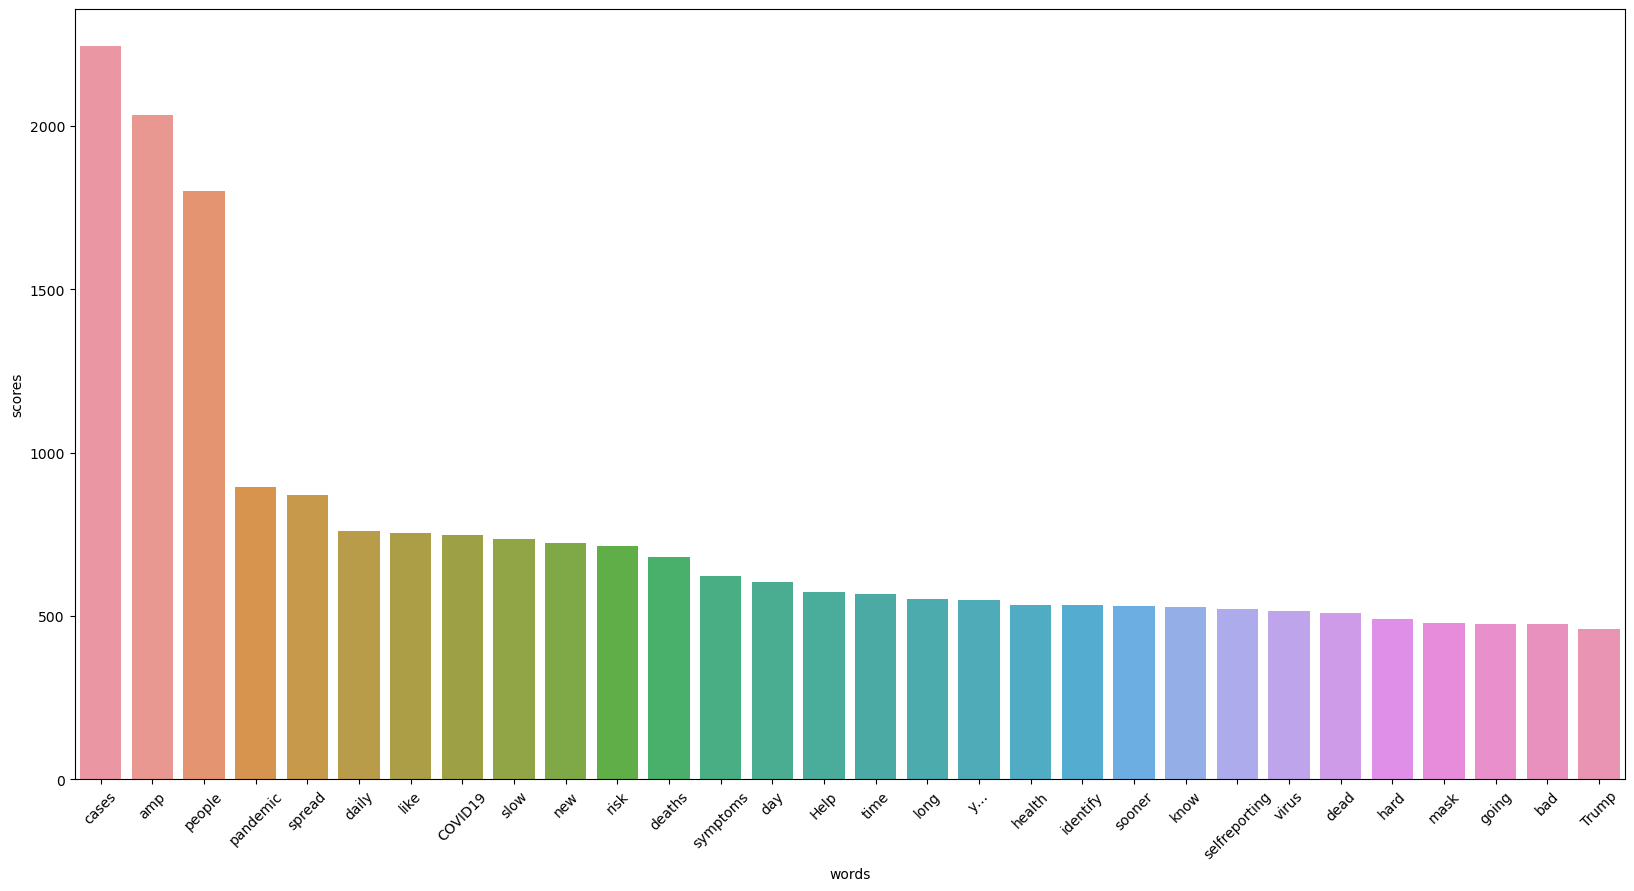

In [78]:
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

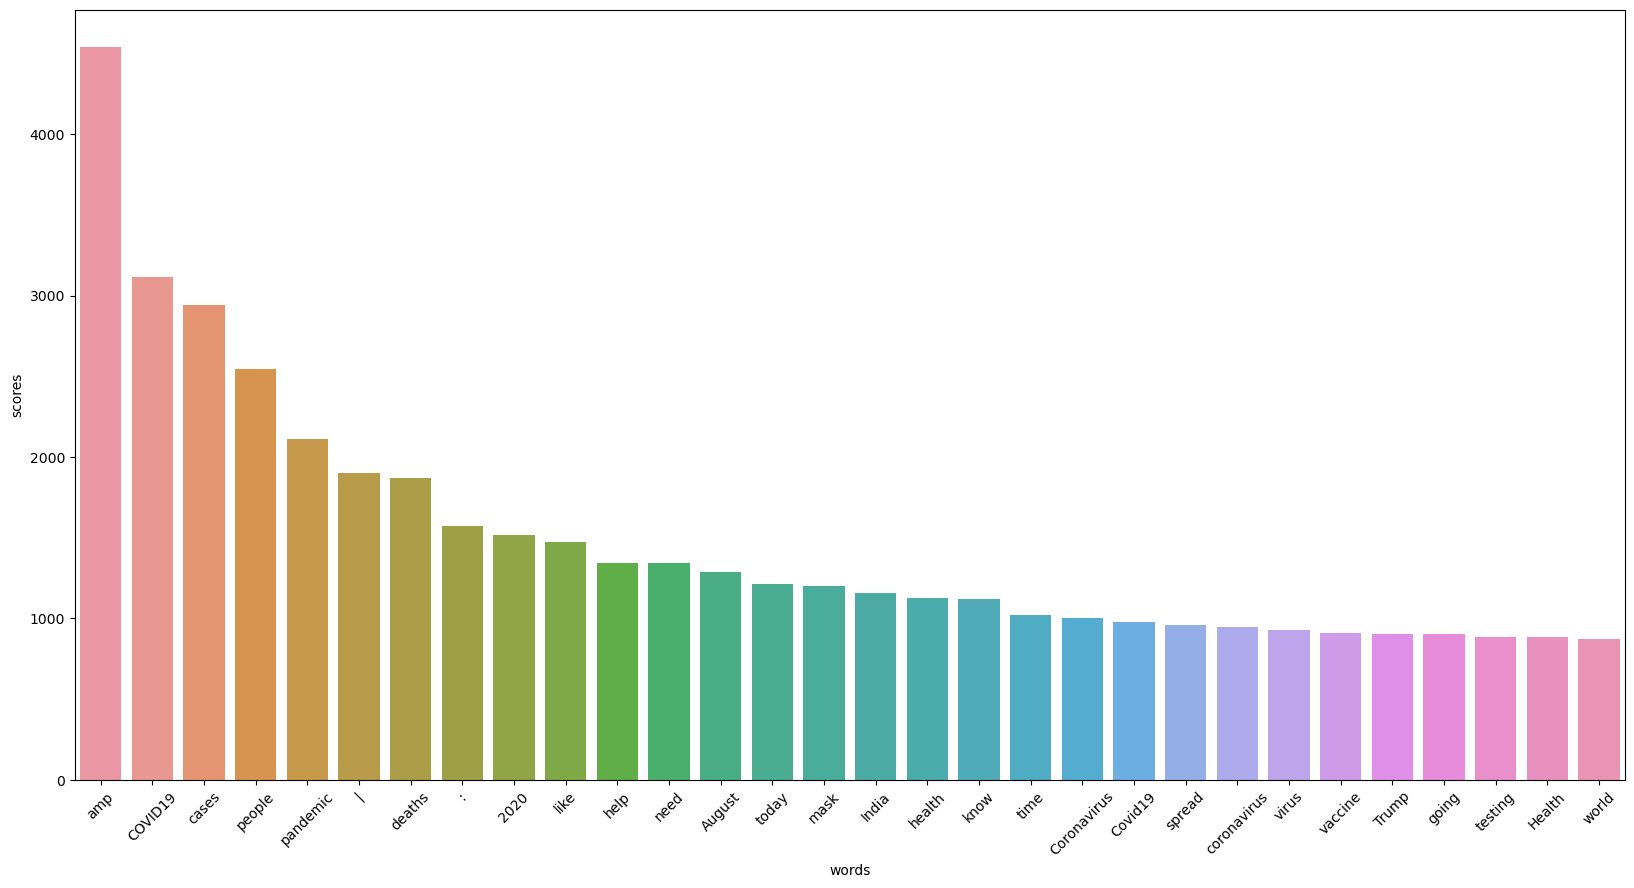

In [79]:
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xticks(rotation=45)
plt.show()